In [25]:
log_path = "/data/w2b/accuracies3.log"
sem_accs = dict()
synt_accs = dict()
current_header = None
header_match = "[INFO] Current vec len "
sem_match = "Semantic accuracy: "
synt_match = "Syntactic accuracy: "
for l in open(log_path, "r").readlines():
    l = str(l)
    if l.startswith(header_match):
        current_header = l[len(header_match):-1]
    if sem_match in l:
        sem_offset = l.index(sem_match) + len(sem_match)
        synt_offset = l.index(synt_match) + len(synt_match)

        new_sem_val = float(l[sem_offset:l.find(" ", sem_offset)])
        new_synt_val = l[synt_offset:l.find(" ", synt_offset)]
        if "nan" in new_synt_val:
            new_synt_val = 0
        else:
            new_synt_val = float(new_synt_val)
        try:
            sem_accs[current_header].append(new_sem_val)
            synt_accs[current_header].append(new_synt_val)
        except KeyError:
            sem_accs[current_header] = [new_sem_val]
            synt_accs[current_header] = [new_synt_val]

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

sem_accs = pd.DataFrame(sem_accs)
synt_accs = pd.DataFrame(synt_accs)

sem_accs.head()

,10:,12:,14:,16:,18:,20:,22:,24:,26:,28:,...,440:,460:,480:,500:,520:,540:,560:,580:,600:,620:
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.00,54.74,52.17,66.21,58.70,60.08,63.44,64.62,68.18,65.22
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.58,32.74,31.28,37.96,34.23,37.84,36.13,39.42,41.38,37.47
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.39,29.35,27.98,33.81,30.51,33.70,32.30,35.05,36.89,33.37
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.14,31.92,28.90,35.12,34.05,34.08,33.18,36.29,38.61,34.67
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.55,32.11,29.53,35.36,34.21,34.25,33.48,36.28,38.83,34.97


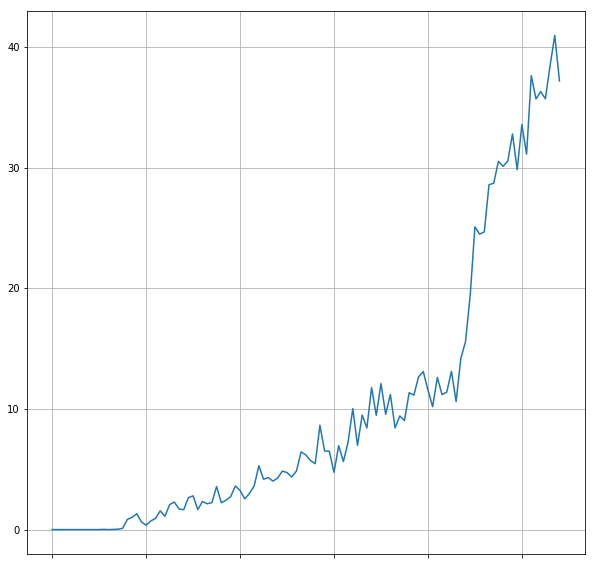

In [27]:
plt.figure(figsize = (10, 10))
sem_accs.mean().plot(grid=True)

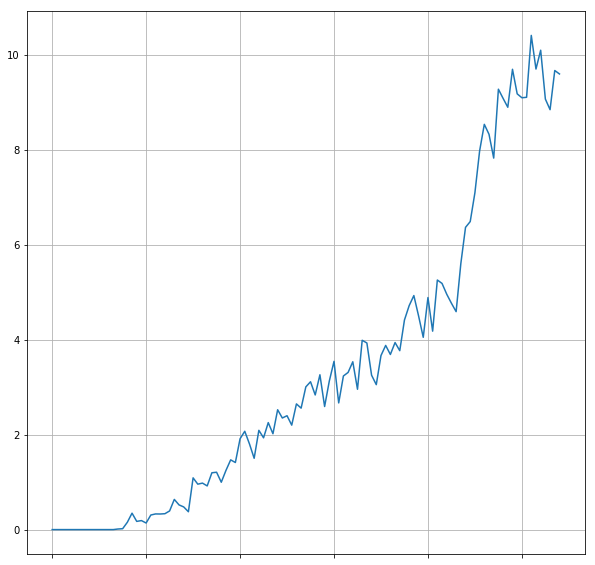

In [28]:
plt.figure(figsize = (10, 10))
synt_accs.mean().plot(grid=True)